In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("historic.csv")

In [ ]:
df.head()

item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top

In [ ]:
df.shape

(8000, 6)

The number of rows and column are 8000 and 6 respectively

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [ ]:
df.nunique()


item_no              8000
category                6
main_promotion          4
color                  10
stars                  57
success_indicator       2
dtype: int64

we have got idea about the data here

In [ ]:
df.isnull().sum()

chevron_right


item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

This indicates that the dataset doesnt have any null values

There is no duplicate data also this means our data set is clean

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

This signifies that there are a total of 6 categories of fashion and there count

# Data encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
 # here we have encoded 6 product category into num using label encoder
le = LabelEncoder()
encoded_category1 = le.fit_transform(df['category'])

In [ ]:
print(encoded_category1)

[5 1 3 ... 4 0 3]


In [ ]:
df['category'] = encoded_category1

<ipython-input-29-79ff0c9ef52d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = encoded_category1


In [ ]:
encoded_categories1 = le.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [ ]:
encoded_values1 = le.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1))
for category1, value1 in category_mapping1.items():
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")

Encoded Category: Blouse, Encoded Value: 0
Encoded Category: Hoodie, Encoded Value: 1
Encoded Category: Polo-Shirt, Encoded Value: 2
Encoded Category: Sweatshirt, Encoded Value: 3
Encoded Category: T-Shirt, Encoded Value: 4
Encoded Category: Tunic, Encoded Value: 5


The categories are marked as per the encoded value to its original name


In [ ]:
pd.crosstab(df['category'], df['success_indicator'])

success_indicator  flop   top
category                     
0                   363   883
1                   258   481
2                   817   729
3                   453   907
4                   271  1188
5                   653   997

Here we can see that the Top are tshirts  followed by sweatshirts and the Tunic which are good and the flop are Polo-shirts

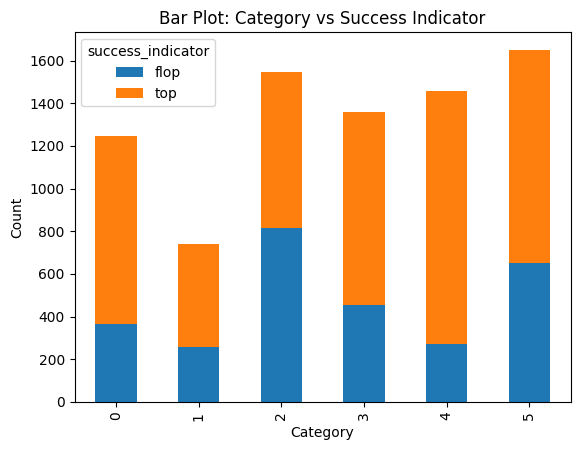

In [ ]:
cross_tab = pd.crosstab(df['category'], df['success_indicator'])

cross_tab.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()


# Now on based on color

In [ ]:
df['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
 # here we have encoded 6 product category into num using label encoder
le1 = LabelEncoder()
encoded_category2 = le1.fit_transform(df['color'])

In [ ]:
print(encoded_category2)

[3 7 7 ... 9 1 1]


In [ ]:
df['category'] = encoded_category2


<ipython-input-47-125c526fc393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = encoded_category2


In [ ]:
encoded_categories2 = le1.classes_
encoded_categories2

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [ ]:
encoded_values2 = le1.transform(encoded_categories2)
category_mapping2 = dict(zip(encoded_categories2, encoded_values2))
for category2, value2 in category_mapping2.items():
    print(f"Encoded color: {category2}, Encoded Value: {value2}")

Encoded color: Black, Encoded Value: 0
Encoded color: Blue, Encoded Value: 1
Encoded color: Brown, Encoded Value: 2
Encoded color: Green, Encoded Value: 3
Encoded color: Multi-Color, Encoded Value: 4
Encoded color: Orange, Encoded Value: 5
Encoded color: Pink, Encoded Value: 6
Encoded color: Red, Encoded Value: 7
Encoded color: White, Encoded Value: 8
Encoded color: Yellow, Encoded Value: 9


In [ ]:
pd.crosstab(df['color'], df['success_indicator'])

success_indicator  flop  top
color                       
Black               189  623
Blue                332  912
Brown               179  406
Green               217  511
Multi-Color         708  735
Orange              190  402
Pink                 87  325
Red                 417  359
White                89  263
Yellow              407  649

Here we can see that the red color is the most flopped and the top is Blue Color

In [ ]:
ct = pd.crosstab(df['color'], df['success_indicator'])

ct.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('color')
plt.ylabel('Count')
plt.title('Bar Plot: color vs Success Indicator')
plt.show()


# For main promotion

In [ ]:
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le3 = LabelEncoder()
encoded_main_promotion = le3.fit_transform(df['main_promotion'])
print(encoded_main_promotion)

[0 1 0 ... 1 1 2]


In [ ]:
print(encoded_category3)

[0 1 0 ... 1 1 2]


In [ ]:
df['main_promotion'] = encoded_category3


In [ ]:
encoded_categories_mp = le3.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [ ]:
encoded_values2 = le3.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [ ]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2

success_indicator  flop   top
main_promotion               
0                   953  1293
1                   930  1502
2                   335   974
3                   597  1416

In [ ]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

# Stars

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           8000 non-null   int64 
 1   main_promotion     8000 non-null   int64 
 2   color              8000 non-null   object
 3   stars              8000 non-null   int64 
 4   success_indicator  8000 non-null   object
 5   main_pormotion     8000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 375.1+ KB


As per chatgpt and some other research we found that the if its above 3 i.e 4 or 5 we can consider it as a Top and 3 as neutral and  1,2 as flop.Since we have only flop and top we consider 4,5 as top and rest flop


As star is in float we convert it to int

In [ ]:
df['stars'] = df['stars'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           8000 non-null   int64 
 1   main_promotion     8000 non-null   int64 
 2   color              8000 non-null   object
 3   stars              8000 non-null   int64 
 4   success_indicator  8000 non-null   object
 5   main_pormotion     8000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 375.1+ KB


In [ ]:
df['stars'] = np.where(df['stars'] <= 3, 0, df['stars'])

In [ ]:
df['stars'] = np.where(df['stars'] > 3, 1, df['stars'])

In [ ]:
df['stars'].value_counts()

0    5361
1    2639
Name: stars, dtype: int64

Here we find that the number of flops are more as compared to top

In [ ]:
df.head()

category  main_promotion  color  stars success_indicator  main_pormotion
0         0               0  Green      0              flop               0
1         1               1    Red      0              flop               1
2         0               0    Red      1               top               0
3         1               1   Blue      0              flop               1
4         1               1  Green      1               top               1

# Success Indicator

In [ ]:
df['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64